#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#**Importing Dataset**

In [3]:
file_path = '/content/drive/MyDrive/DataSets/cyclone_preheater.xlsx'
data = pd.read_excel(file_path)

In [4]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [6]:
data.shape

(377719, 7)

#Data cleaning

In [7]:
#converting object to float
import pandas as pd

columns_to_convert = [
    'Cyclone_Inlet_Gas_Temp',
    'Cyclone_Material_Temp',
    'Cyclone_Outlet_Gas_draft',
    'Cyclone_cone_draft',
    'Cyclone_Gas_Outlet_Temp',
    'Cyclone_Inlet_Draft'
]

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
print(data.dtypes)

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object


In [8]:
#checking for null value
data.isnull().sum()

,0
time,0
Cyclone_Inlet_Gas_Temp,1320
Cyclone_Material_Temp,1591
Cyclone_Outlet_Gas_draft,1321
Cyclone_cone_draft,1320
Cyclone_Gas_Outlet_Temp,1321
Cyclone_Inlet_Draft,1322


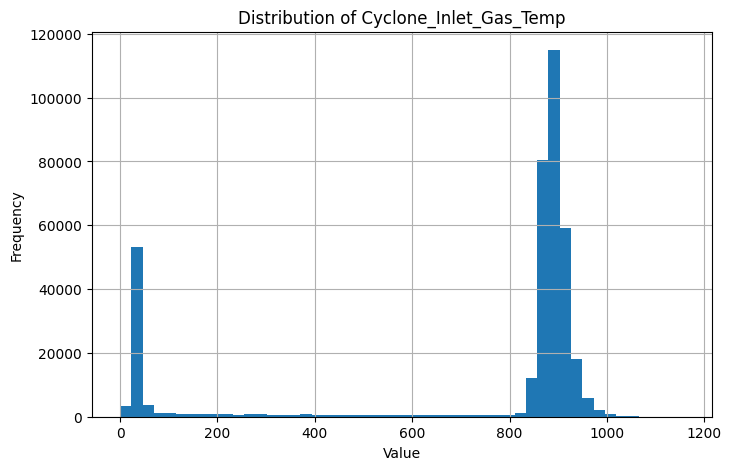

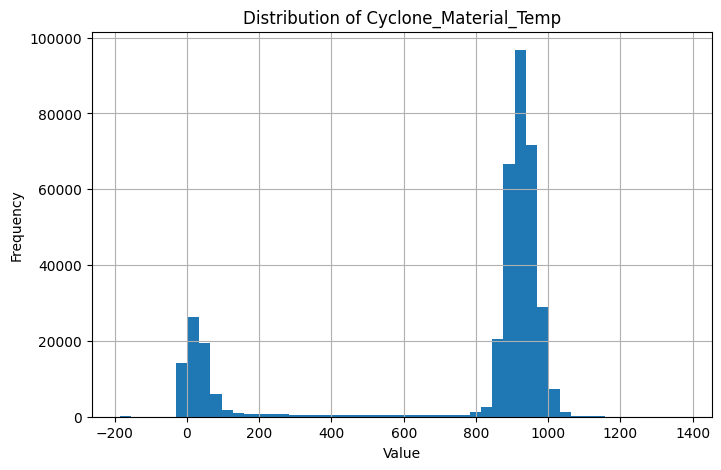

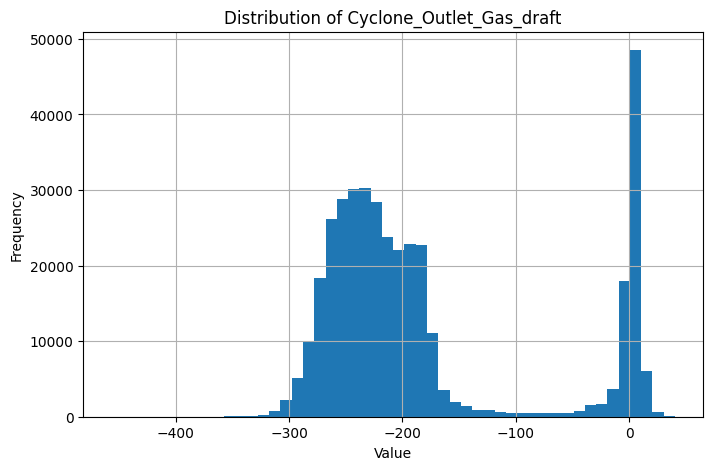

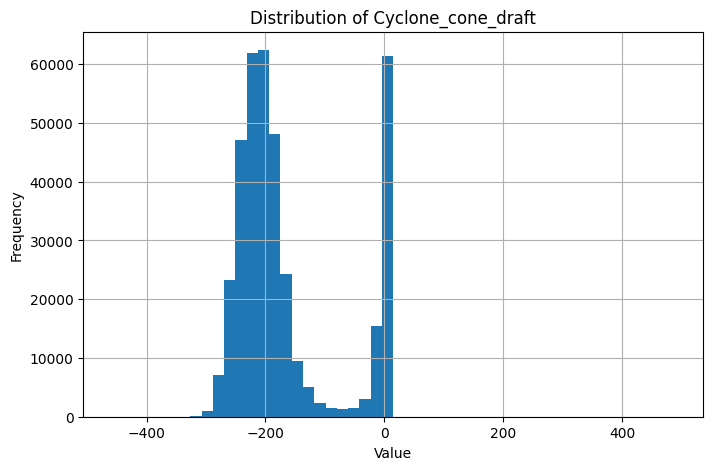

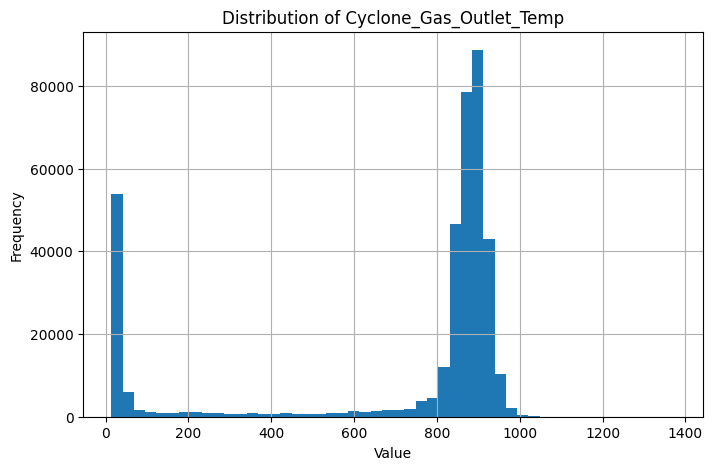

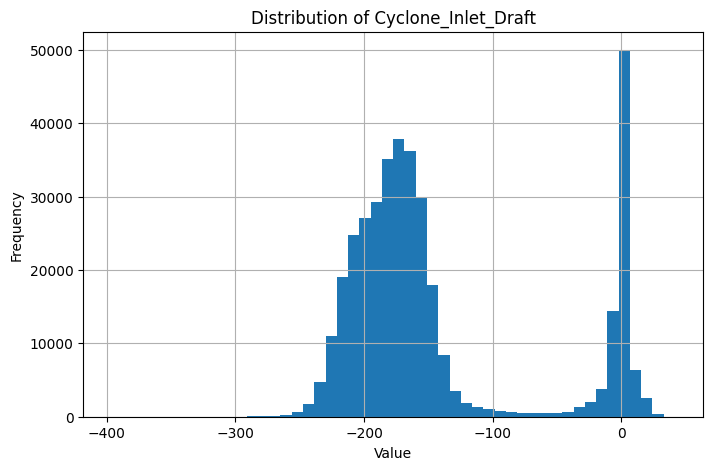

In [9]:
#Distribution of value and frequency
columns_to_check = [
    'Cyclone_Inlet_Gas_Temp',
    'Cyclone_Material_Temp',
    'Cyclone_Outlet_Gas_draft',
    'Cyclone_cone_draft',
    'Cyclone_Gas_Outlet_Temp',
    'Cyclone_Inlet_Draft'
]

for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    data[col].dropna().astype(float).hist(bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [10]:
for col in columns_to_check:
    data[col] = data[col].fillna(data[col].median())

In [11]:
data.isnull().sum()

,0
time,0
Cyclone_Inlet_Gas_Temp,0
Cyclone_Material_Temp,0
Cyclone_Outlet_Gas_draft,0
Cyclone_cone_draft,0
Cyclone_Gas_Outlet_Temp,0
Cyclone_Inlet_Draft,0


In [12]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [13]:
data.shape

(377719, 7)

#Exploratory Data Analysis

In [14]:
cols = [col for col in data.columns if col != 'time']

In [15]:
# Function to visualize distribution
def dist_plot(column_name):
    sns.histplot(data[column_name], kde=True, color='midnightblue')  # Histogram with KDE
    plt.title(f'{column_name} Distribution', fontsize=16, pad=5)
    plt.gca().patch.set_edgecolor('black')
    plt.gca().patch.set_linewidth(1.5)


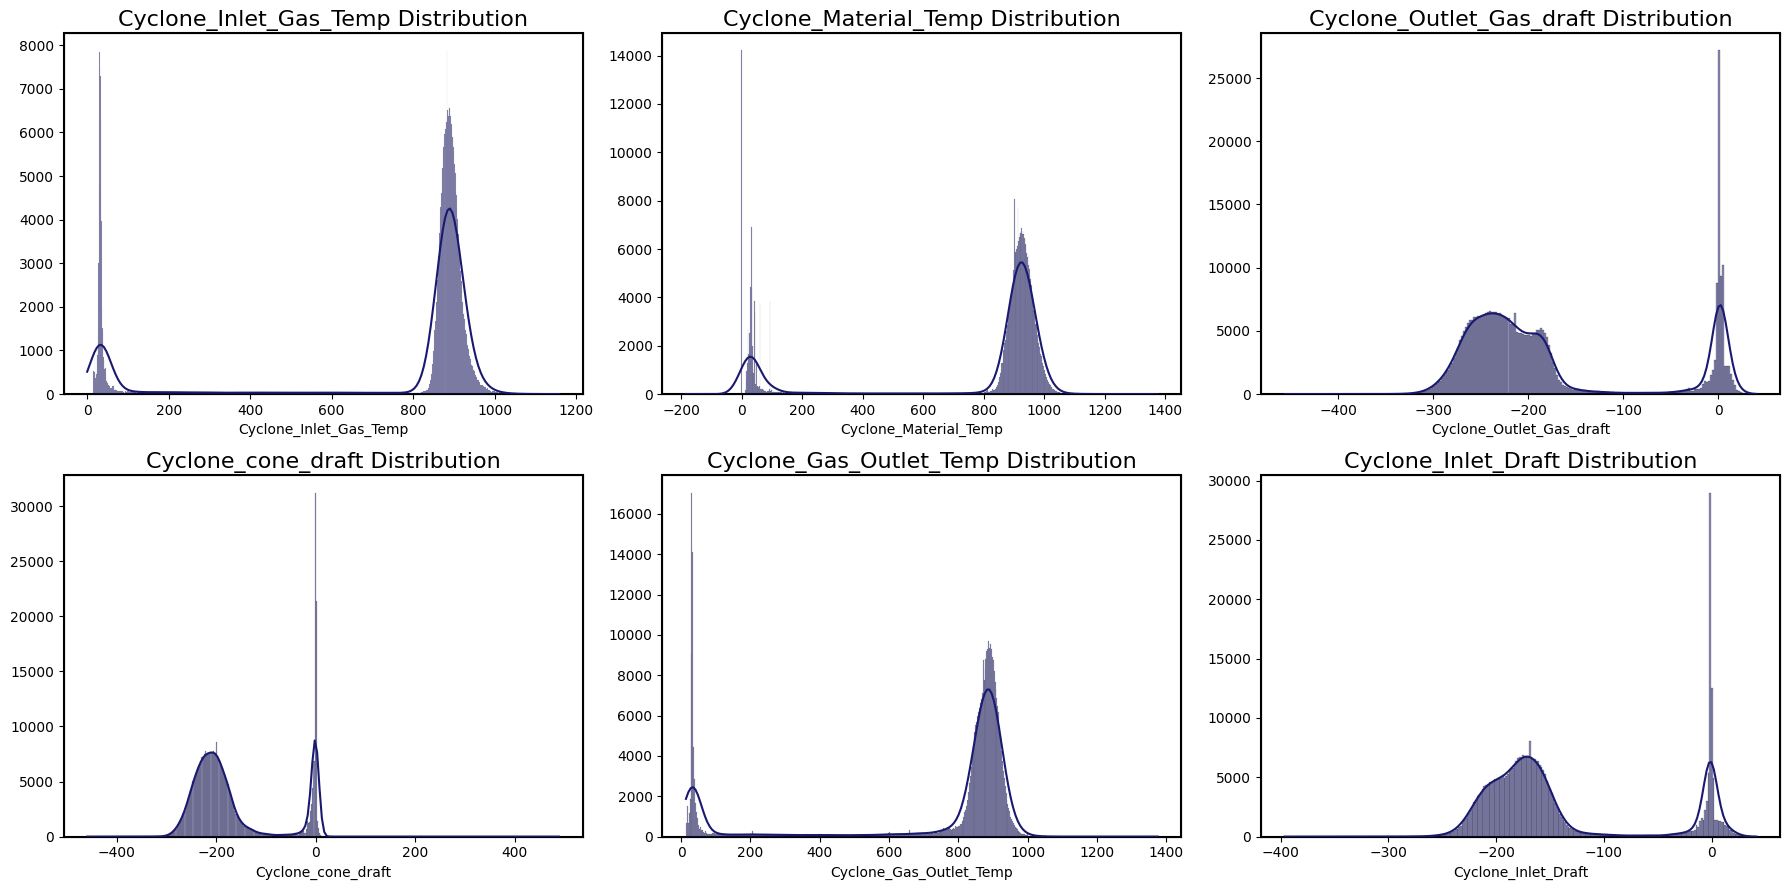

In [16]:
plt.figure(figsize=(18, 9))

for i in range(len(cols)):
    plt.subplot(2, 3, i + 1)  # Create subplot (2 rows, 3 columns)
    dist_plot(cols[i])
    plt.ylabel('')
    plt.tight_layout()

plt.show()

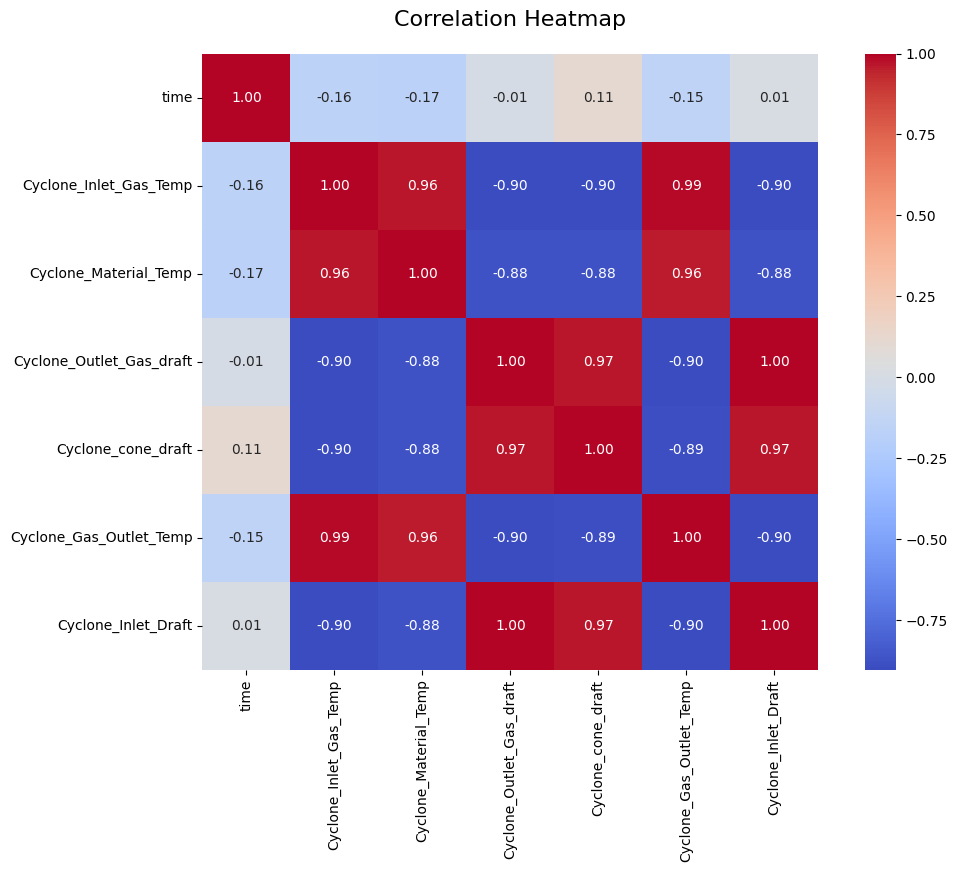

In [17]:
# Calculate correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',cmap='coolwarm',cbar=True,square=True)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.show()

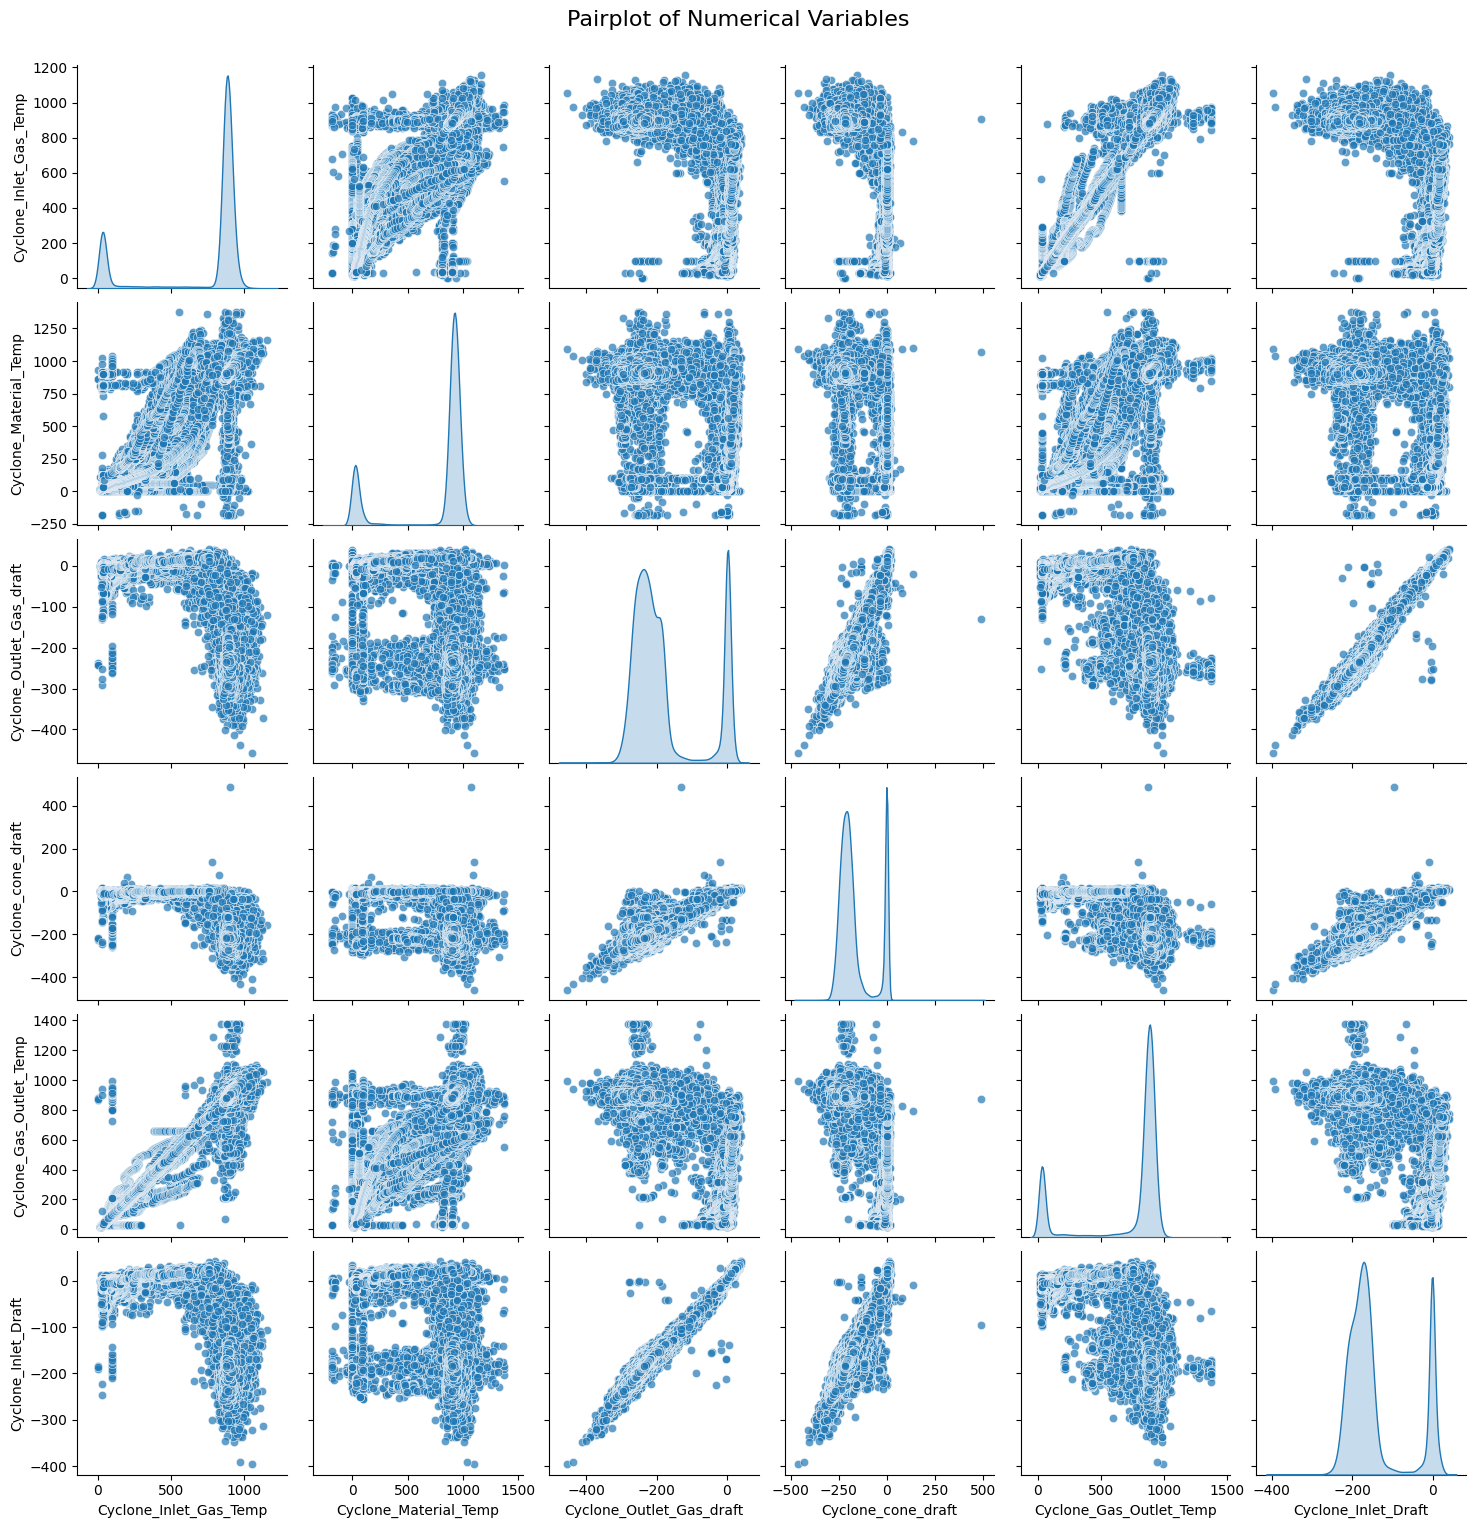

In [18]:
sns.pairplot(data[columns_to_convert], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pairplot of Numerical Variables', fontsize=16, y=1.02)
plt.show()

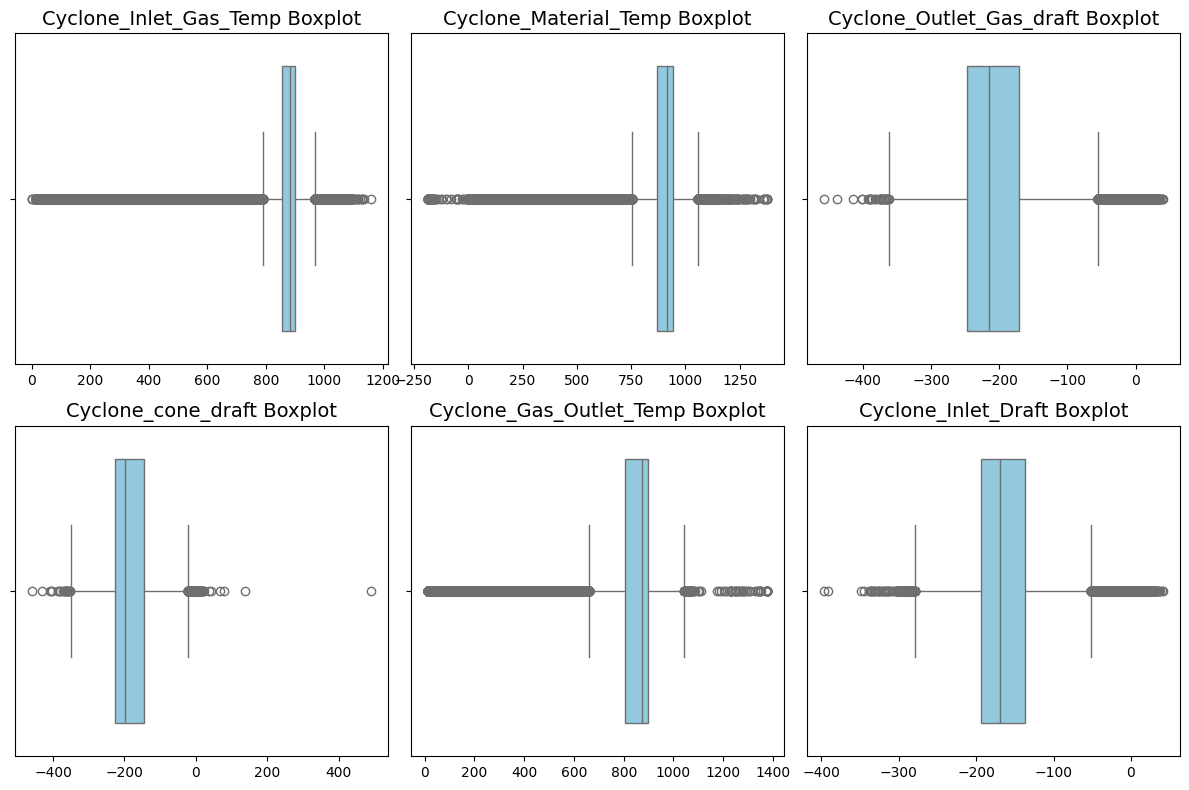

In [19]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'{col} Boxplot', fontsize=14)
    plt.xlabel('')

plt.tight_layout()
plt.show()

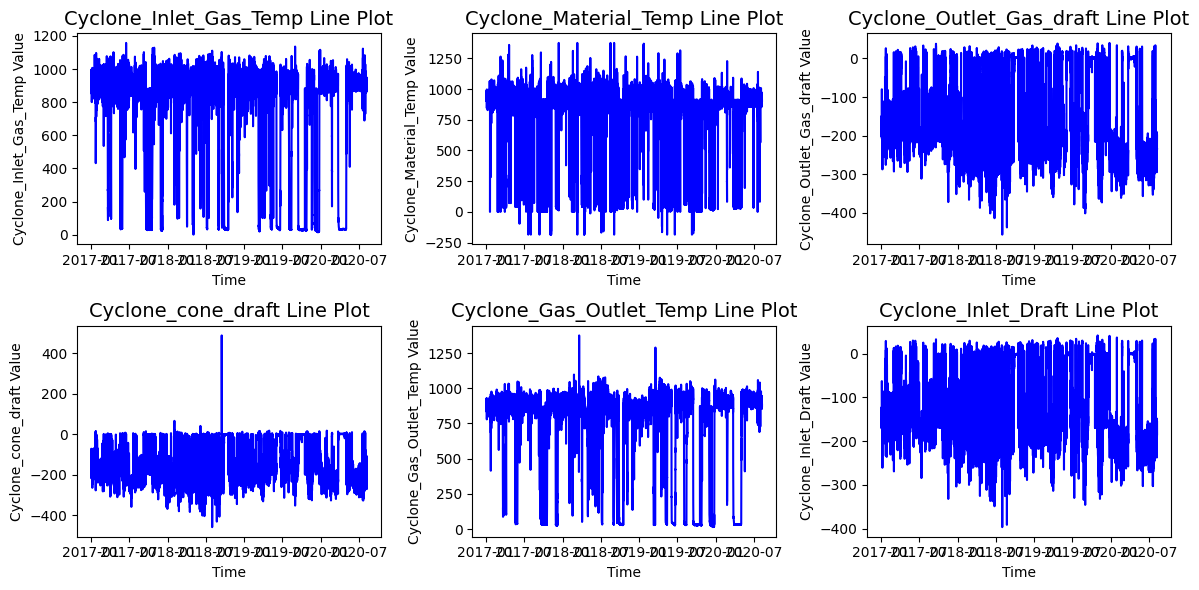

In [20]:
# Plotting the data using matplotlib
plt.figure(figsize=(12, 6))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(x=data['time'], y=data[col], color='blue')

    plt.title(f'{col} Line Plot', fontsize=14)
    plt.xlabel('Time')
    plt.ylabel(f'{col} Value')

plt.tight_layout()
plt.show()

#Dimesionality Reduction

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data[cols]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

pca_df = pd.DataFrame({'column-1': components[:, 0], 'column-2': components[:, 1]})

scaler = StandardScaler()
scaled_components = scaler.fit_transform(pca_df)

scaled_pca_df = pd.DataFrame(scaled_components, columns=['scaled_column-1', 'scaled_column-2'])
scaled_pca_df.head()


,scaled_column-1,scaled_column-2
0,0.421989,0.253223
1,0.448574,0.239294
2,0.449050,0.338993
3,0.448443,0.324296
4,0.483804,0.318550


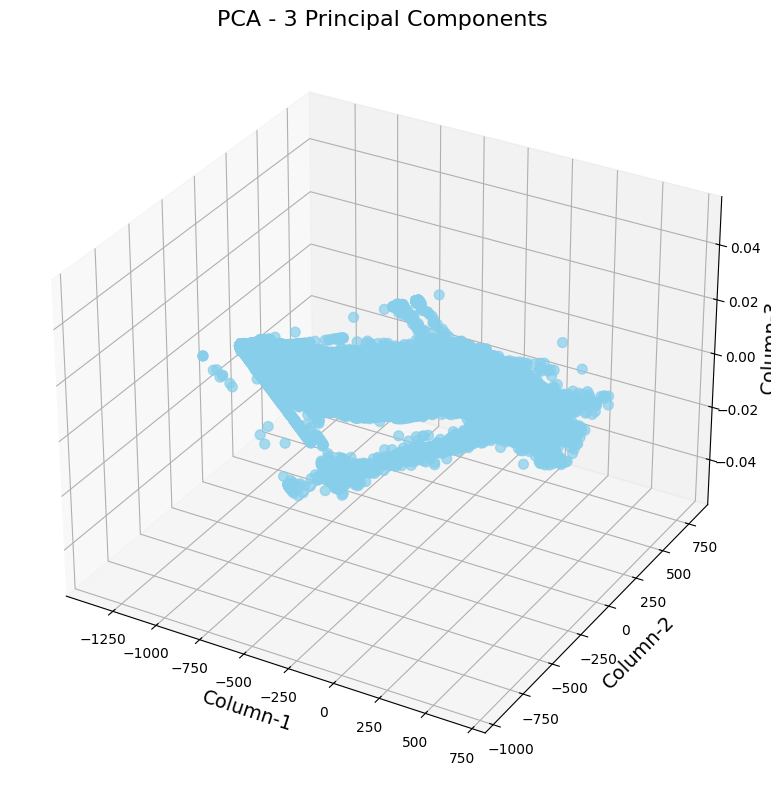

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['column-1'], pca_df['column-2'], zs=0, s=50, alpha=0.7, c='skyblue')

ax.set_title('PCA - 3 Principal Components', fontsize=16)
ax.set_xlabel('Column-1', fontsize=14)
ax.set_ylabel('Column-2', fontsize=14)
ax.set_zlabel('Column-3', fontsize=14)

plt.tight_layout()
plt.show()


# IsolationForest

In [23]:
from sklearn.ensemble import IsolationForest

scaled_pca_df['original_index'] = data.index

outliers_fraction = 0.05

model = IsolationForest(contamination=outliers_fraction, n_jobs=-1, random_state=42)
model.fit(scaled_pca_df[['scaled_column-1', 'scaled_column-2']])

scaled_pca_df['anomaly_if'] = model.predict(scaled_pca_df[['scaled_column-1', 'scaled_column-2']])

In [24]:
scaled_pca_df['anomaly_if'].value_counts()

,count
anomaly_if,
1,358833
-1,18886


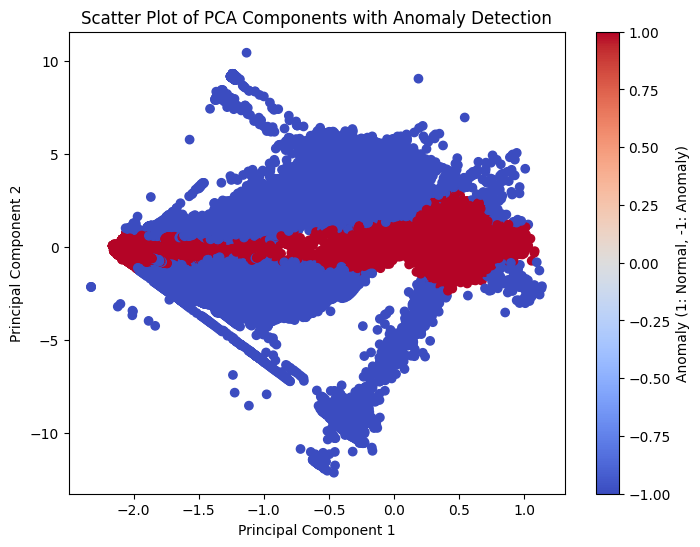

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_pca_df['scaled_column-1'], scaled_pca_df['scaled_column-2'], c=scaled_pca_df['anomaly_if'], cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components with Anomaly Detection')
plt.colorbar(label='Anomaly (1: Normal, -1: Anomaly)')
plt.show()

In [26]:
# merge the anomaly predictions back into the original dataframe using the index
data = pd.merge(data, scaled_pca_df[['original_index', 'anomaly_if']], left_index=True, right_on='original_index', how='left')
data = data.drop('original_index', axis=1)
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly_if
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1


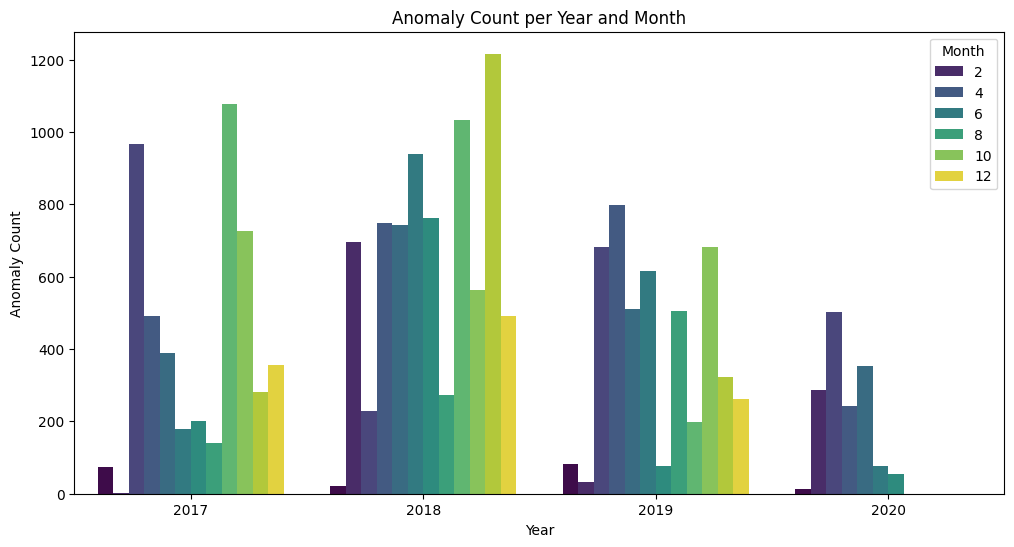

In [27]:
data['time'] = pd.to_datetime(data['time'])
data['Year'] = data['time'].dt.year
data['Month'] = data['time'].dt.month

# Group by year and count the number of anomalies
anomaly_counts = data.groupby(['Year', 'Month'])['anomaly_if'].apply(lambda x: (x == -1).sum()).reset_index(name='Anomaly_Count')

# Plot the bar graph using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Anomaly_Count', hue='Month', data=anomaly_counts, palette='viridis')
plt.title('Anomaly Count per Year and Month')
plt.xlabel('Year')
plt.ylabel('Anomaly Count')
plt.show()

Dates of Anomalies:
5297     2017-01-19 09:25:00
5298     2017-01-19 09:30:00
5299     2017-01-19 09:35:00
5300     2017-01-19 09:40:00
5301     2017-01-19 09:45:00
                 ...        
375407   2020-07-30 11:40:00
375408   2020-07-30 11:45:00
375409   2020-07-30 11:50:00
375410   2020-07-30 11:55:00
375411   2020-07-30 12:00:00
Name: time, Length: 18886, dtype: datetime64[ns]


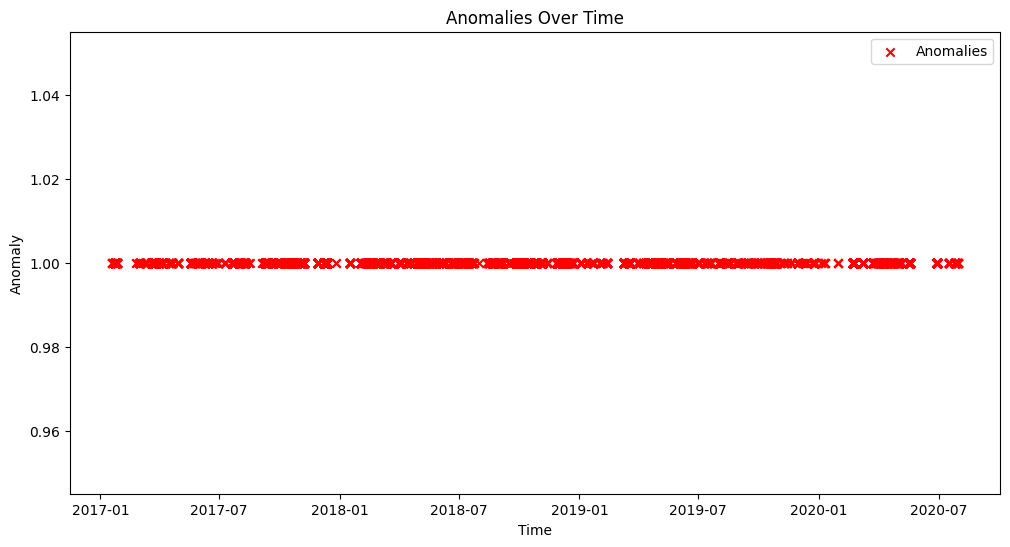

Table of Anomaly Dates:
                      time
5297   2017-01-19 09:25:00
5298   2017-01-19 09:30:00
5299   2017-01-19 09:35:00
5300   2017-01-19 09:40:00
5301   2017-01-19 09:45:00
...                    ...
375407 2020-07-30 11:40:00
375408 2020-07-30 11:45:00
375409 2020-07-30 11:50:00
375410 2020-07-30 11:55:00
375411 2020-07-30 12:00:00

[18886 rows x 1 columns]


In [28]:
anomaly_data = data[data['anomaly_if'] == -1]

print("Dates of Anomalies:")
print(anomaly_data['time'])

plt.figure(figsize=(12, 6))
plt.scatter(anomaly_data['time'], [1] * len(anomaly_data), marker='x', color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Anomaly')
plt.title('Anomalies Over Time')
plt.legend()
plt.show()

print("Table of Anomaly Dates:")
print(anomaly_data[['time']])


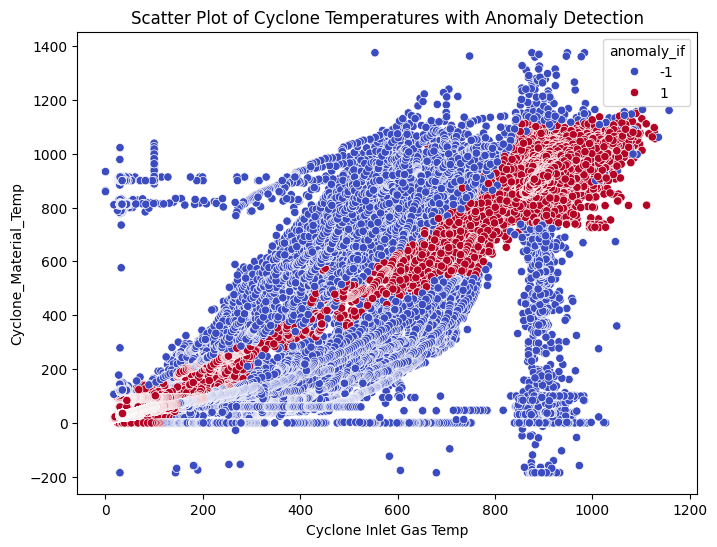

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cyclone_Inlet_Gas_Temp', y='Cyclone_Material_Temp', data=data, hue='anomaly_if', palette='coolwarm')
plt.xlabel('Cyclone Inlet Gas Temp')
plt.ylabel('Cyclone_Material_Temp')
plt.title('Scatter Plot of Cyclone Temperatures with Anomaly Detection')
plt.show()


In [30]:
anomaly_data[['time']]

,time
5297,2017-01-19 09:25:00
5298,2017-01-19 09:30:00
5299,2017-01-19 09:35:00
5300,2017-01-19 09:40:00
5301,2017-01-19 09:45:00
...,...
375407,2020-07-30 11:40:00
375408,2020-07-30 11:45:00
375409,2020-07-30 11:50:00
375410,2020-07-30 11:55:00
